In [103]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from statistics import mean
from scikitplot.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import logging
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.neural_network import MLPClassifier
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [104]:
def addestraSVC(nomeDataset, X, y, c, gamma, kernel, dim):

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30, stratify=y)
    
    #standardizzo i dati
    sc = StandardScaler()
    X_train_standardizzato = sc.fit_transform(X_train)
    X_test_standardizzato = sc.fit_transform(X_test)
    
    #applico la riduzione della dimensionalita'
    pca = PCA(n_components=dim)
    
    X_train_ridotto = pca.fit_transform(X_train_standardizzato)
    X_test_ridotto = pca.fit_transform(X_test_standardizzato)
    
    #addestro la SVC
    model = SVC(gamma = gamma, C=c, kernel = kernel)
    model.fit(X_train_ridotto, y_train)
    
    y_pred = model.predict(X_test_ridotto)
    
    #calcolo lo score
    scoreStandardizzato = accuracy_score(y_test, y_pred)
    
    #Non standardizzo i  dati ma riduco subito la dimensionalita' e addestro la SVC
    X_train_ridotto = pca.fit_transform(X_train)
    X_test_ridotto = pca.fit_transform(X_test)
    
    model = SVC(gamma = gamma, C=c, kernel = kernel)
    model.fit(X_train_ridotto, y_train)
    
    y_pred_not_standardizzato = model.predict(X_test_ridotto)
    
    #calcolo lo score
    score_not_standardizzato = accuracy_score(y_test, y_pred_not_standardizzato)
     
    if scoreStandardizzato > score_not_standardizzato:
        plot_confusion_matrix(y_test, y_pred)
        plt.show()
        logging.info(f'Addestrato {nomeDataset} con una SVC con iperparametri: C {c}, gamma {gamma}, kernel {kernel}, numero dimensioni {dim}')
        return(f'Lo score e stato calcolato standardizzando i dati, score: {scoreStandardizzato}')
    else:
        plot_confusion_matrix(y_test, y_pred_not_standardizzato)
        plt.show()
        logging.info(f'Addestrato {nomeDataset} con una SVC con iperparametri: C {c}, gamma {gamma}, kernel {kernel}, numero dimensioni {dim}')
        return(f'Lo score e stato calcolato non standardizzando i dati, score: {score_not_standardizzato}')
    

In [105]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [106]:
X = df.drop('Research', 1)
y = df['Research']

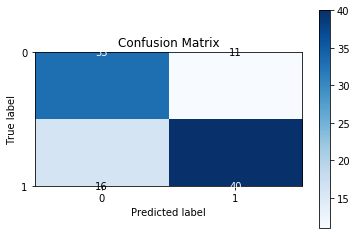

'Lo score e stato calcolato standardizzando i dati, score: 0.73'

In [107]:
addestraSVC('Admission_Predict_Ver1', X=X, y=y, c=0.1, gamma=0.2, kernel='linear', dim=8)